# Лабораторная работа №2

## Тряков Д.И. М20-ЯЭ

## Вариант №7

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
camera_df  = pd.read_csv('camera_dataset.csv')
camera_df.head()

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0


### 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

<AxesSubplot:>

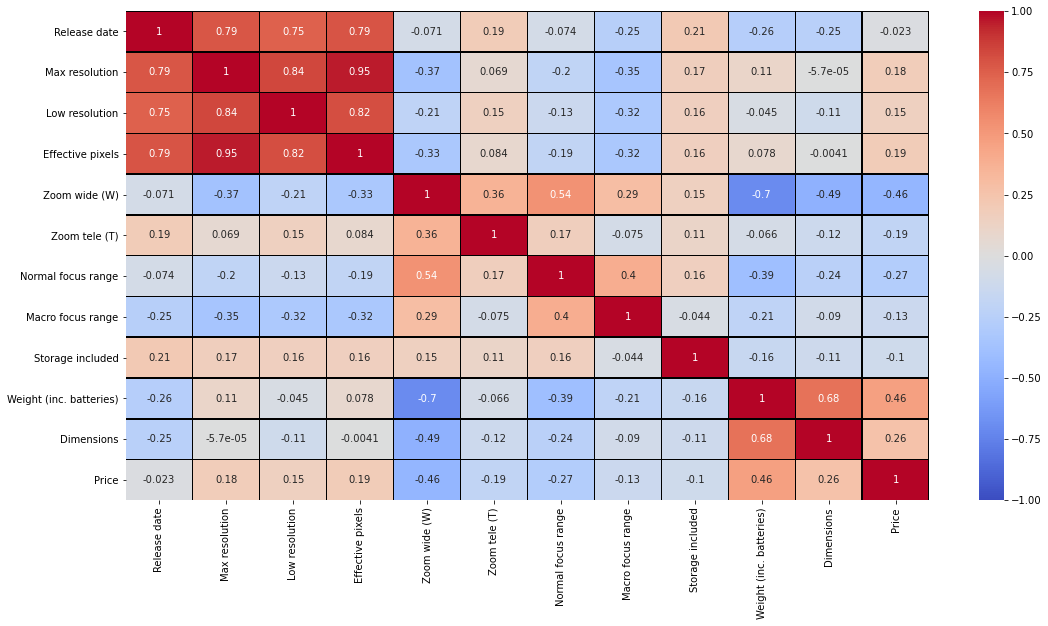

In [111]:
fig = plt.figure(figsize=(18, 9))
sns.heatmap(camera_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.6, linecolor='black')

### 2. Вычислите корреляцию Пирсона и Спирмена между Price и Max (Min) Resolution. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.



## Корреляция Пирсона

In [12]:
camera_df[['Price', 'Max resolution']].corr(method = 'pearson')

,Price,Max resolution
Price,1.000000,0.183202
Max resolution,0.183202,1.000000


### p-value

In [113]:
from scipy import stats
corp, pvalue = stats.pearsonr(camera_df['Price'],camera_df['Max resolution'])
print ('Коэффициент корреляции =', corp)
print ('P-value =',pvalue)

Коэффициент корреляции = 0.1832024591068466
P-value = 2.7528330768260004e-09


## Корреляция Спирмена

In [13]:
camera_df[['Price', 'Max resolution']].corr(method = 'spearman')

,Price,Max resolution
Price,1.000000,0.101269
Max resolution,0.101269,1.000000


### p-value

In [115]:
from scipy import stats
cors, pvalue = stats.spearmanr(camera_df['Price'],camera_df['Max resolution'])
print ('Коэффициент корреляции =', cors)
print ('P-value =',pvalue)

Коэффициент корреляции = 0.10126852664923244
P-value = 0.0010863948570554284


### 3. Постройте график изменения средней цены на камеры по годам.

In [126]:
a = camera_df.groupby('Release date')['Price'].mean()
a

Release date
1994    129.000000
1995    129.000000
1996    554.000000
1997    367.181818
1998    382.750000
1999    349.641509
2000    482.442623
2001    635.188235
2002    552.370787
2003    413.316832
2004    507.673759
2005    448.930070
2006    367.934641
2007    436.036810
Name: Price, dtype: float64

<AxesSubplot:xlabel='Release date'>

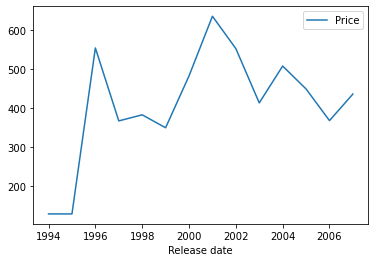

In [124]:
a.plot(legend=bool)

### 4. Определите компанию, камеры которой наиболее часто встречаются в наборе данных.

In [16]:
def get_model(Model):
    return Model.split(' ')[0].strip()
model = camera_df['Model'].apply(get_model)
model.head()

0    Agfa
1    Agfa
2    Agfa
3    Agfa
4    Agfa
Name: Model, dtype: object

In [19]:
model.value_counts().index.values[0]

'Olympus'

### 5. Добавьте в набор данных признак, являющийся произведением двух других признаков.

In [61]:
camera_df['Total price'] = camera_df['Storage included'] * camera_df['Price']
camera_df

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price,Total price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0,716.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0,716.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0,358.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0,1076.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0,51960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0,496.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0,992.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0,496.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0,992.0


### 6. Удалите строки с нулевыми значениями в данных. Выведите размер набора данных до и после удаления.

In [81]:
camera_df = camera_df.rename (columns={'Release date':'Release_date', 'Max resolution':'Max_resolution', 'Low resolution':'Low_resolution', 'Effective pixels':'Effective_pixels', 'Zoom wide (W)':'Zoom_wide', 'Zoom tele (T)':'Zoom_tele', 'Normal focus range':'Normal_focus_range', 'Macro focus range':'Macro_focus_range', 'Storage included':'Storage_included', 'Weight (inc. batteries)':'Weight_inc_batteries'})
camera_df

,Model,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide,Zoom_tele,Normal_focus_range,Macro_focus_range,Storage_included,Weight_inc_batteries,Dimensions,Price
0,Agfa ePhoto 1280,1997,1024.0,640.0,0.0,38.0,114.0,70.0,40.0,4.0,420.0,95.0,179.0
1,Agfa ePhoto 1680,1998,1280.0,640.0,1.0,38.0,114.0,50.0,0.0,4.0,420.0,158.0,179.0
2,Agfa ePhoto CL18,2000,640.0,0.0,0.0,45.0,45.0,0.0,0.0,2.0,0.0,0.0,179.0
3,Agfa ePhoto CL30,1999,1152.0,640.0,0.0,35.0,35.0,0.0,0.0,4.0,0.0,0.0,269.0
4,Agfa ePhoto CL30 Clik!,1999,1152.0,640.0,0.0,43.0,43.0,50.0,0.0,40.0,300.0,128.0,1299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


In [82]:
b = camera_df[(camera_df.Release_date > 0) &
          (camera_df.Max_resolution > 0) &
          (camera_df.Low_resolution > 0) &
          (camera_df.Effective_pixels > 0) &
          (camera_df.Zoom_wide > 0) &
          (camera_df.Zoom_tele > 0) &
          (camera_df.Normal_focus_range > 0) &
          (camera_df.Macro_focus_range > 0) &
          (camera_df.Storage_included > 0) &
          (camera_df.Weight_inc_batteries > 0) &
          (camera_df.Dimensions > 0) &
          (camera_df.Price > 0)]
         

In [83]:
b

,Model,Release_date,Max_resolution,Low_resolution,Effective_pixels,Zoom_wide,Zoom_tele,Normal_focus_range,Macro_focus_range,Storage_included,Weight_inc_batteries,Dimensions,Price
5,Agfa ePhoto CL45,2001,1600.0,640.0,1.0,51.0,51.0,50.0,20.0,8.0,270.0,119.0,179.0
9,Canon PowerShot A10,2001,1280.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0
10,Canon PowerShot A100,2002,1280.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0
11,Canon PowerShot A20,2001,1600.0,1024.0,1.0,35.0,105.0,76.0,16.0,8.0,375.0,110.0,139.0
12,Canon PowerShot A200,2002,1600.0,1024.0,1.0,39.0,39.0,20.0,5.0,8.0,225.0,110.0,139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Toshiba PDR-M65,2001,2048.0,1024.0,3.0,38.0,114.0,10.0,10.0,8.0,320.0,120.0,62.0
1034,Toshiba PDR-M70,2000,2048.0,1024.0,3.0,35.0,105.0,80.0,9.0,16.0,390.0,116.0,62.0
1035,Toshiba PDR-M71,2001,2048.0,1024.0,3.0,35.0,98.0,80.0,10.0,8.0,340.0,107.0,62.0
1036,Toshiba PDR-M81,2001,2400.0,1200.0,3.0,35.0,98.0,80.0,10.0,16.0,340.0,107.0,62.0


### 7. Определите камеру с максимальной стоимостью, определите камеру с минимальной стоимостью.

In [84]:
camera_df[['Model', 'Price']].head()


,Model,Price
0,Agfa ePhoto 1280,179.0
1,Agfa ePhoto 1680,179.0
2,Agfa ePhoto CL18,179.0
3,Agfa ePhoto CL30,269.0
4,Agfa ePhoto CL30 Clik!,1299.0


#### Модели камер с максимальной стоимостью

In [85]:
camera_df[(camera_df.Price == camera_df.Price.max())] ['Model'] 

52             Canon EOS-1Ds
53     Canon EOS-1Ds Mark II
54    Canon EOS-1Ds Mark III
Name: Model, dtype: object

#### Модели камер с минимальной стоимостью

In [86]:
camera_df[(camera_df.Price == camera_df.Price.min())] ['Model']

347    JVC GC-QX3HD
348    JVC GC-QX5HD
Name: Model, dtype: object

### 8. Определите год, в который было выпущено максимально количество новых камер.

In [87]:
camera_df.Release_date.value_counts().index.values[0]

2007